<img src='images/julia-logo.svg' width=300>

# Why Julia?

 * Fast
 
 * Dynamic, but... optionally typed
 
 * Composable (mulitple dispatch)
  
 * General Purpose
 
 * Open Source
 
 * Amazing Packages (e.g. DifferentialEquations.jl, Flux.jl)
 
 * Growing community ([Slack Workspace](https://join.slack.com/t/julialang/shared_invite/zt-w0pifg7p-18IUSkZy_WpofNumiTTROQ))

# How fast?

<img src='images/benchmarks.svg' width=600>

# Multiple Dispatch

In [1]:
my_add(x::Int, y::Int) = x + y
my_add(x::Float64, y::Float64) = x + y

my_add (generic function with 2 methods)

In [2]:
my_add(1, 2)

3

In [13]:
my_add(1.0, 2)

LoadError: MethodError: no method matching my_add(::Float64, ::Int64)
[0mClosest candidates are:
[0m  my_add([91m::Int64[39m, ::Int64) at In[1]:1
[0m  my_add(::Float64, [91m::Float64[39m) at In[1]:2

---

In [4]:
my_add(x::String, y::String) = "$(x) $(y)"

my_add (generic function with 3 methods)

In [5]:
my_add("Hello", "World!")

"Hello World!"

In [6]:
import Base.+
+(x::String, y::String) = my_add(x, y)

+ (generic function with 191 methods)

In [7]:
"Hello" + "World!"

"Hello World!"

---

In [8]:
struct Point
    x::Float64
    y::Float64
end

my_add(A::Point, B::Point) = Point(A.x + B.x, A.y + B.y)

my_add (generic function with 4 methods)

In [9]:
A = Point(1.0, 2.0)
B = Point(1.0, 2.0)
my_add(A,B)

Point(2.0, 4.0)

# Generic programming 

In [10]:
using Measurements

x = 5.23 ± 0.14
y = 45.77 ± 0.1

x + y

51.0 ± 0.17

## Simple pendulum

$$
\ddot{\theta} = \frac{g}{L} \theta
$$

[Example Source](https://tutorials.sciml.ai/html/type_handling/02-uncertainties.html)

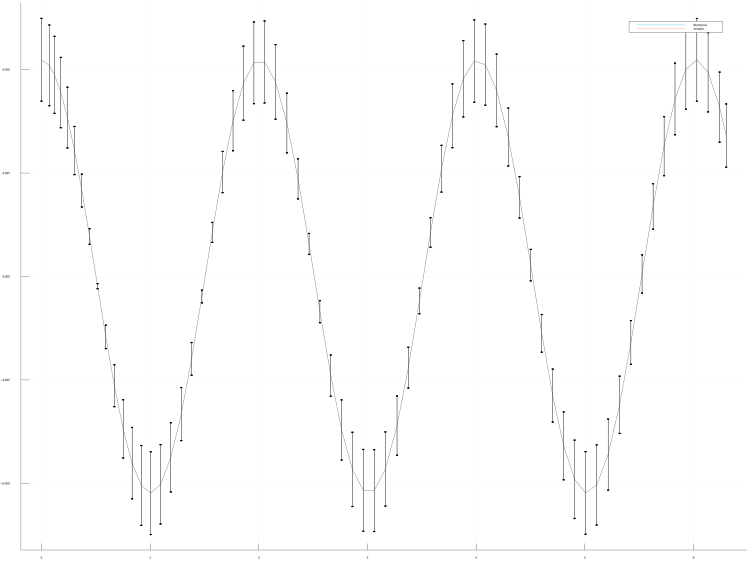

In [11]:
using DifferentialEquations, Measurements, Plots

g = 9.79 ± 0.02; # Gravitational constants
L = 1.00 ± 0.01; # Length of the pendulum

#Initial Conditions
u₀ = [0 ± 0, π / 60 ± 0.01] # Initial speed and initial angle
tspan = (0.0, 6.3)

#Define the problem
function simplependulum(du,u,p,t)
    θ  = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g/L)*θ
end

#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
sol = solve(prob, Tsit5(), reltol = 1e-6)

# Analytic solution
u = u₀[2] .* cos.(sqrt(g / L) .* sol.t)

plot(sol.t, getindex.(sol.u, 2), label = "Numerical")
plot!(sol.t, u, label = "Analytic", size=(4000*0.75, 3000*0.75))

In [12]:
macro javascript_str(s) display("text/javascript", s); end
javascript"""
function hideElements(elements, start) {
for(var i = 0, length = elements.length; i < length;i++) {
    if(i >= start) {
        elements[i].style.display = "none";
    }
}
}
var prompt_elements = document.getElementsByClassName("prompt");
hideElements(prompt_elements, 0)
"""